<a href="https://colab.research.google.com/github/rennyatwork/CegepSteFoy_IA/blob/main/example_book_steven_dascoli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
#import tensorflow.keras.optimizers
from sklearn.model_selection import train_test_split

In [9]:
#!pip install tensorflow

In [5]:
path_csv = "https://raw.githubusercontent.com/stevedas/aiBook/main/crimeSTATS.csv"
crime_data = pd.read_csv(path_csv, sep =",")

In [6]:
crime_data.head()

,total_crime_reported_per_1_million_res,annual_police_funding_per_res,%_high_school_25yearsPlus,%_16_to_19_not_in_HS,%_18_to_24_in_college,%_college_degree
0,478,40,74,11,31,20
1,494,32,72,11,43,18
2,643,57,70,18,16,16
3,341,31,71,11,25,19
4,773,67,72,9,29,24


In [12]:
## train test split
def get_train_test(pDf=crime_data, p_var_y='total_crime_reported_per_1_million_res', p_test_size=0.2, p_random_state=25):
  dfX = pDf.drop(p_var_y, axis=1).values
  dfY = pDf[p_var_y]

  X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=p_test_size, random_state=p_random_state)
  return X_train, X_test, y_train, y_test


In [14]:
## create model
def create_model (p_learning_rate, p_dropout_rate, pDfX, p_nb_neuron_input=128, p_activation='relu'):
  model = Sequential()
  model.add(Dense(p_nb_neuron_input, input_dim=pDfX.shape[1], activation=p_activation))
  model.add(Dropout(p_dropout_rate))
  model.add(Dense(int(p_nb_neuron_input/2), activation=p_activation))
  model.add(Dropout(p_dropout_rate))
  model.add(Dense(int(p_nb_neuron_input/4), activation=p_activation))
  model.add(Dropout(p_dropout_rate))
  model.add(Dense(1))

  adam = Adam(lr = p_learning_rate)

  model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
  return model


In [15]:
## getting train, test sets
X_train, X_test, y_train, y_test = get_train_test()

In [19]:
model = create_model (0.01, 0.3, X_train)

In [40]:
def do_analysis(pModel, pXTrain, pYTrain, pXTest, pYTest,
                p_dropout_rate =0.3, p_learning_rate=0.01, p_epochs =30, p_batch_size=10,
                p_validation_split=0.2, p_verbose=True, p_plot_graph=1):
  model_history = pModel.fit(pXTrain, pYTrain, batch_size=p_batch_size, epochs=p_epochs, validation_split = p_validation_split, verbose=1)

  ## evaluate model's accuracy (use TEST vars, NOT TRAIN)
  score = pModel.evaluate(pXTest, pYTest, verbose=p_verbose)

  print("[Loss]: ", score[0])
  print("[Mean Abs Error]: ", score[1])

  if(p_plot_graph):
    plot_graph(model_history)


Epoch 1/150
4/4 [==============================] - 0s 45ms/step - loss: 81536.8281 - mae: 205.9520 - val_loss: 77373.0703 - val_mae: 238.9933
Epoch 2/150
4/4 [==============================] - 0s 26ms/step - loss: 80875.5938 - mae: 215.6683 - val_loss: 83001.0938 - val_mae: 255.3180
Epoch 3/150
4/4 [==============================] - 0s 25ms/step - loss: 121575.4688 - mae: 272.0967 - val_loss: 92122.0312 - val_mae: 276.1102
Epoch 4/150
4/4 [==============================] - 0s 13ms/step - loss: 132918.4375 - mae: 306.8596 - val_loss: 90625.1484 - val_mae: 273.0543
Epoch 5/150
4/4 [==============================] - 0s 12ms/step - loss: 76845.7812 - mae: 207.1846 - val_loss: 84184.4062 - val_mae: 258.3780
Epoch 6/150
4/4 [==============================] - 0s 13ms/step - loss: 88649.3281 - mae: 213.7282 - val_loss: 80252.5000 - val_mae: 247.3778
Epoch 7/150
4/4 [==============================] - 0s 17ms/step - loss: 97448.0938 - mae: 239.1598 - val_loss: 76840.4688 - val_mae: 235.7365
Epoc

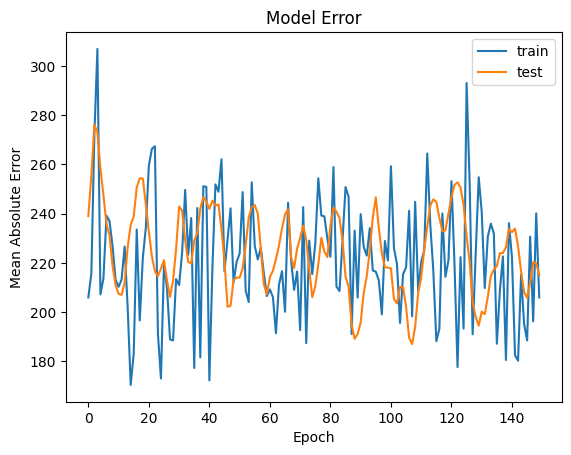

In [43]:
## Modele valuation
do_analysis(model, X_train, y_train, X_test, y_test, p_epochs=150, p_verbose=0)

In [27]:
import matplotlib.pyplot as plt

In [28]:
## to be called from within do_analysis()
def plot_graph(p_model_history):
  plt.plot(p_model_history.history['mae'])
  plt.plot(p_model_history.history['val_mae'])
  plt.legend(['train', 'test'], loc='upper right')
  plt.title('Model Error')
  plt.ylabel('Mean Absolute Error')
  plt.xlabel('Epoch')
